In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
final = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
train = train.drop(['id','EC3','EC4','EC5','EC6'], axis=1)
train.head()

BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v     Chi3v  \
0  323.390782   9.879918  5.875576   5.875576  4.304757   4.304757  2.754513   
1  273.723798   7.259037  4.441467   5.834958  3.285046   4.485235  2.201375   
2  521.643822  10.911303  8.527859  11.050864  6.665291   9.519706  5.824822   
3  567.431166  12.453343  7.089119  12.833709  6.478023  10.978151  7.914542   
4  112.770735   4.414719  2.866236   2.866236  1.875634   1.875634  1.036450   

      Chi4n  EState_VSA1  EState_VSA2  ...  PEOE_VSA7  PEOE_VSA8  SMR_VSA10  \
0  1.749203     0.000000    11.938294  ...   0.000000   0.000000  17.744066   
1  1.289775    45.135471     0.000000  ...   0.000000   0.000000   7.822697   
2  1.770579    15.645394     6.606882  ...  53.378235   0.000000  15.645394   
3  3.067181    95.639554     0.000000  ...   0.000000   6.420822  15.645394   
4  0.727664    17.980451    12.841643  ...  19.386400   0.000000  11.938611   

    SMR_VSA5  SlogP_VSA3  VSA_EState9  fr_COO  fr_COO2  EC1  EC2  
0   0.000000    4.794537    35.527357       0        0    1    1  
1  30.705892   13.825658    44.707310       0        0    0    1  
2  73.143616   17.964475    45.660120       0        0    1    1  
3  62.107304   31.961948    87.509997       0        0    1    1  
4  18.883484    9.589074    33.333333       2        2    1    0  

[5 rows x 33 columns]

In [4]:
train.dtypes

BertzCT              float64
Chi1                 float64
Chi1n                float64
Chi1v                float64
Chi2n                float64
Chi2v                float64
Chi3v                float64
Chi4n                float64
EState_VSA1          float64
EState_VSA2          float64
ExactMolWt           float64
FpDensityMorgan1     float64
FpDensityMorgan2     float64
FpDensityMorgan3     float64
HallKierAlpha        float64
HeavyAtomMolWt       float64
Kappa3               float64
MaxAbsEStateIndex    float64
MinEStateIndex       float64
NumHeteroatoms         int64
PEOE_VSA10           float64
PEOE_VSA14           float64
PEOE_VSA6            float64
PEOE_VSA7            float64
PEOE_VSA8            float64
SMR_VSA10            float64
SMR_VSA5             float64
SlogP_VSA3           float64
VSA_EState9          float64
fr_COO                 int64
fr_COO2                int64
EC1                    int64
EC2                    int64
dtype: object

In [5]:
# Handle duplicates
duplicate_rows_data = train[train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 33)


In [6]:
# Loop through each column and count the number of distinct values
for column in train.columns:
    num_distinct_values = len(train[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

BertzCT: 2368 distinct values
Chi1: 1259 distinct values
Chi1n: 3157 distinct values
Chi1v: 3306 distinct values
Chi2n: 3634 distinct values
Chi2v: 3725 distinct values
Chi3v: 3448 distinct values
Chi4n: 2930 distinct values
EState_VSA1: 719 distinct values
EState_VSA2: 445 distinct values
ExactMolWt: 1666 distinct values
FpDensityMorgan1: 556 distinct values
FpDensityMorgan2: 650 distinct values
FpDensityMorgan3: 654 distinct values
HallKierAlpha: 388 distinct values
HeavyAtomMolWt: 860 distinct values
Kappa3: 2245 distinct values
MaxAbsEStateIndex: 2356 distinct values
MinEStateIndex: 2142 distinct values
NumHeteroatoms: 40 distinct values
PEOE_VSA10: 250 distinct values
PEOE_VSA14: 291 distinct values
PEOE_VSA6: 219 distinct values
PEOE_VSA7: 262 distinct values
PEOE_VSA8: 237 distinct values
SMR_VSA10: 409 distinct values
SMR_VSA5: 492 distinct values
SlogP_VSA3: 217 distinct values
VSA_EState9: 1946 distinct values
fr_COO: 8 distinct values
fr_COO2: 8 distinct values
EC1: 2 distin

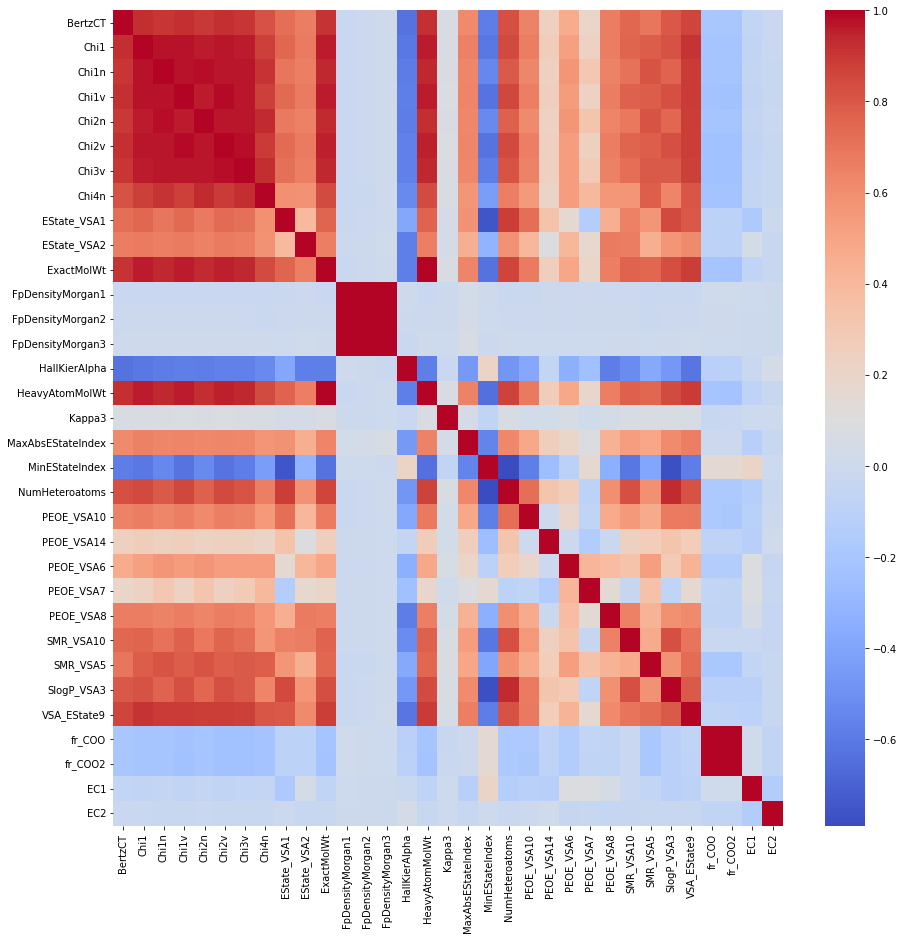

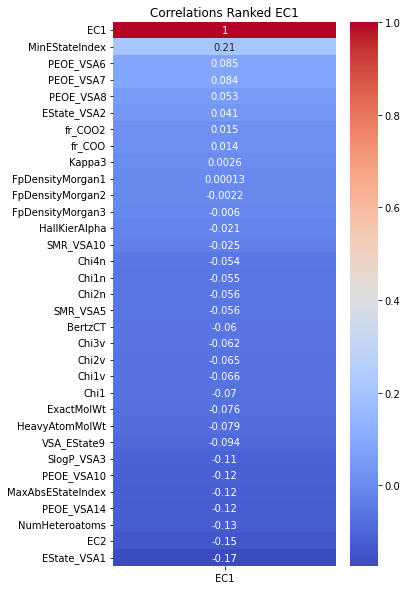

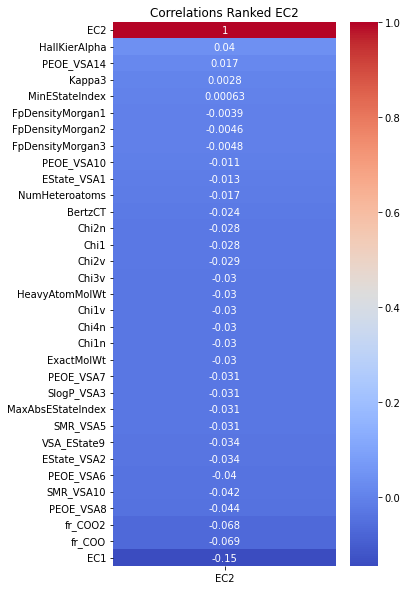

In [7]:
plt.figure(figsize = (15,15))
sns.heatmap(train.corr(), annot=False, cmap="coolwarm")
plt.show()

plt.figure(figsize = (5,10))
sns.heatmap(train.corr()[['EC1']].sort_values(by='EC1', ascending=False), annot = True, cmap="coolwarm")
plt.title('Correlations Ranked EC1')
plt.show()

plt.figure(figsize = (5,10))
sns.heatmap(train.corr()[['EC2']].sort_values(by='EC2', ascending=False), annot = True, cmap="coolwarm")
plt.title('Correlations Ranked EC2')
plt.show()

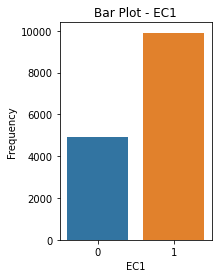

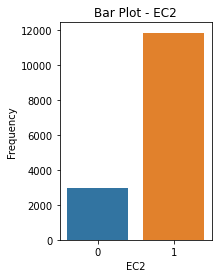

In [8]:
plt.subplot(1, 2, 1)
sns.countplot(data=train, x="EC1")
plt.xlabel("EC1")
plt.ylabel("Frequency")
plt.title("Bar Plot - EC1")
plt.show()

plt.subplot(1, 2, 2)
sns.countplot(data=train, x="EC2")
plt.xlabel("EC2")
plt.ylabel("Frequency")
plt.title("Bar Plot - EC2")
plt.show()

In [9]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
# See https://www.kaggle.com/competitions/playground-series-s3e18/discussion/419646 for feature knowledge

y = train[['EC1', 'EC2']]
X = train.drop(['EC1','EC2'], axis=1)
X = X.drop_duplicates()

def feat_engineering(X):
    X['MolWt'] = X['HeavyAtomMolWt'] + X['ExactMolWt']
    X['EState_VSA'] = X['EState_VSA1'] + X['EState_VSA2']
    X['fr_total'] = X['fr_COO'] + X['fr_COO2']
    X=X.drop(['fr_COO', 'fr_COO2', 'FpDensityMorgan2', 'FpDensityMorgan3', 'HeavyAtomMolWt', 'ExactMolWt',
             'EState_VSA1', 'EState_VSA2', 'Chi1v', 'Chi1n', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n'], axis=1)

    scaler = preprocessing.MinMaxScaler()
    X_scaled = scaler.fit_transform(X.values)
    
    pca = PCA(n_components=10)
    pca_df = pca.fit_transform(X_scaled)

    for i in range(pca_df.shape[1]):
        X[f'PC{i+1}'] = pca_df[:, i]
        
    X_scaled = scaler.fit_transform(X.values)
    X = pd.DataFrame(X_scaled, columns=X.columns)
    
    return X

X = feat_engineering(X)
X.head()

BertzCT      Chi1  FpDensityMorgan1  HallKierAlpha    Kappa3  \
0  0.079458  0.142053          0.997282       0.876023  0.069425   
1  0.067255  0.104370          0.997528       0.893567  0.066351   
2  0.128169  0.156882          0.997139       0.812865  0.073671   
3  0.139419  0.179053          0.997254       0.752047  0.068530   
4  0.027708  0.063474          0.997675       0.775439  0.066802   

   MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  \
0           0.762784        0.527203        0.095238    0.000000    0.189739   
1           0.699435        0.121441        0.238095    0.250000    0.016215   
2           0.718993        0.102313        0.214286    0.000000    0.032430   
3           0.714715        0.085251        0.452381    0.437500    0.044224   
4           0.630555        0.377304        0.095238    0.061864    0.024747   

   ...       PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  ...  0.170947  0.324700  0.329271  0.539737  0.294206  0.499011  0.427967   
1  ...  0.252075  0.071143  0.503811  0.448892  0.346162  0.310571  0.446252   
2  ...  0.270447  0.241683  0.467288  0.703076  0.347133  0.237826  0.430035   
3  ...  0.403033  0.104107  0.565006  0.366423  0.369374  0.378619  0.446669   
4  ...  0.166014  0.304673  0.345520  0.468432  0.452815  0.332930  0.375602   

        PC8       PC9      PC10  
0  0.126788  0.333114  0.431510  
1  0.311759  0.341359  0.415478  
2  0.363811  0.312320  0.451646  
3  0.409915  0.346241  0.483579  
4  0.438316  0.378537  0.436695  

[5 rows x 30 columns]

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

def get_model(n_input, n_output):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape= [n_input]),
        layers.Dense(n_output, activation='sigmoid'),
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['AUC'],
    )
    
    return model


In [11]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score

# evaluate a model using repeated k-fold cross-validation
aucs = list()
n_input, n_output = X.shape[1], y.shape[1]

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# enumerate folds
for train_ix, test_ix in cv.split(X):
    # prepare data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # define model
    model = get_model(n_input, n_output)
    # fit model
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), 
              verbose=1, batch_size=512, epochs=100, callbacks=[early_stopping])
    
    # make a prediction on the test set
    yhat = model.predict(X_test)
    # auc, store results
    auc1 = roc_auc_score(y_test['EC1'], yhat[:, 0])
    auc2 = roc_auc_score(y_test['EC2'], yhat[:, 1])
    aucs.append((auc1, auc2))

mean_auc1 = sum([auc[0] for auc in aucs]) / len(aucs)
mean_auc2 = sum([auc[1] for auc in aucs]) / len(aucs)
print(mean_auc1)
print(mean_auc2)

Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 0.6872 - auc: 0.4222 - val_loss: 0.6033 - val_auc: 0.4516
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5787 - auc: 0.5608 - val_loss: 0.5681 - val_auc: 0.6093
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5667 - auc: 0.6136 - val_loss: 0.5630 - val_auc: 0.6338
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5623 - auc: 0.6227 - val_loss: 0.5602 - val_auc: 0.6353
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5591 - auc: 0.6252 - val_loss: 0.5566 - val_auc: 0.6357
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5563 - auc: 0.6288 - val_loss: 0.5544 - val_auc: 0.6379
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5539 - auc: 0.6329 - val_loss: 0.5522 - val_auc: 0.6424
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5519 - a

24/24 [==============================] - 0s 1ms/step - loss: 0.5372 - auc: 0.6721 - val_loss: 0.5399 - val_auc: 0.6655
Epoch 64/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5365 - auc: 0.6737 - val_loss: 0.5401 - val_auc: 0.6647
Epoch 65/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5365 - auc: 0.6745 - val_loss: 0.5397 - val_auc: 0.6662
Epoch 66/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5365 - auc: 0.6743 - val_loss: 0.5396 - val_auc: 0.6673
Epoch 67/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5363 - auc: 0.6748 - val_loss: 0.5394 - val_auc: 0.6670
Epoch 68/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5364 - auc: 0.6747 - val_loss: 0.5400 - val_auc: 0.6655
Epoch 69/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5362 - auc: 0.6742 - val_loss: 0.5404 - val_auc: 0.6636
Epoch 70/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5365 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5366 - auc: 0.6706 - val_loss: 0.5475 - val_auc: 0.6630
Epoch 31/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5366 - auc: 0.6697 - val_loss: 0.5474 - val_auc: 0.6638
Epoch 32/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5366 - auc: 0.6702 - val_loss: 0.5476 - val_auc: 0.6653
Epoch 33/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5368 - auc: 0.6695 - val_loss: 0.5483 - val_auc: 0.6650
Epoch 34/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5366 - auc: 0.6702 - val_loss: 0.5471 - val_auc: 0.6654
Epoch 35/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5364 - auc: 0.6705 - val_loss: 0.5469 - val_auc: 0.6639
Epoch 36/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5362 - auc: 0.6710 - val_loss: 0.5466 - val_auc: 0.6657
Epoch 37/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5360 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5588 - auc: 0.6243 - val_loss: 0.5594 - val_auc: 0.6068
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5556 - auc: 0.6312 - val_loss: 0.5566 - val_auc: 0.6141
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5528 - auc: 0.6371 - val_loss: 0.5553 - val_auc: 0.6187
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5504 - auc: 0.6408 - val_loss: 0.5524 - val_auc: 0.6250
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5482 - auc: 0.6457 - val_loss: 0.5507 - val_auc: 0.6306
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5464 - auc: 0.6489 - val_loss: 0.5486 - val_auc: 0.6362
Epoch 11/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5450 - auc: 0.6530 - val_loss: 0.5474 - val_auc: 0.6419
Epoch 12/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5434 - auc: 0.657

24/24 [==============================] - 0s 1ms/step - loss: 0.5343 - auc: 0.6790 - val_loss: 0.5409 - val_auc: 0.6649
Epoch 68/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5341 - auc: 0.6796 - val_loss: 0.5408 - val_auc: 0.6643
Epoch 69/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5341 - auc: 0.6794 - val_loss: 0.5408 - val_auc: 0.6648
Epoch 70/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5340 - auc: 0.6795 - val_loss: 0.5409 - val_auc: 0.6643
Epoch 71/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5342 - auc: 0.6788 - val_loss: 0.5411 - val_auc: 0.6638
Epoch 72/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5340 - auc: 0.6803 - val_loss: 0.5406 - val_auc: 0.6652
Epoch 73/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5339 - auc: 0.6796 - val_loss: 0.5406 - val_auc: 0.6654
Epoch 74/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5339 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5395 - auc: 0.6697 - val_loss: 0.5339 - val_auc: 0.6713
Epoch 31/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5394 - auc: 0.6690 - val_loss: 0.5338 - val_auc: 0.6722
Epoch 32/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5392 - auc: 0.6704 - val_loss: 0.5338 - val_auc: 0.6728
Epoch 33/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5393 - auc: 0.6702 - val_loss: 0.5336 - val_auc: 0.6729
Epoch 34/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5391 - auc: 0.6709 - val_loss: 0.5333 - val_auc: 0.6720
Epoch 35/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5389 - auc: 0.6711 - val_loss: 0.5331 - val_auc: 0.6732
Epoch 36/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5391 - auc: 0.6696 - val_loss: 0.5343 - val_auc: 0.6722
Epoch 37/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5394 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5477 - auc: 0.6473 - val_loss: 0.5414 - val_auc: 0.6572
Epoch 14/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5468 - auc: 0.6507 - val_loss: 0.5407 - val_auc: 0.6608
Epoch 15/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5463 - auc: 0.6509 - val_loss: 0.5399 - val_auc: 0.6628
Epoch 16/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5456 - auc: 0.6553 - val_loss: 0.5392 - val_auc: 0.6660
Epoch 17/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5453 - auc: 0.6553 - val_loss: 0.5387 - val_auc: 0.6634
Epoch 18/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5445 - auc: 0.6580 - val_loss: 0.5383 - val_auc: 0.6691
Epoch 19/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5441 - auc: 0.6582 - val_loss: 0.5379 - val_auc: 0.6679
Epoch 20/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5438 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5372 - auc: 0.6749 - val_loss: 0.5319 - val_auc: 0.6782
Epoch 76/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5368 - auc: 0.6762 - val_loss: 0.5319 - val_auc: 0.6786
Epoch 77/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5371 - auc: 0.6749 - val_loss: 0.5319 - val_auc: 0.6781
Epoch 78/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5369 - auc: 0.6756 - val_loss: 0.5321 - val_auc: 0.6785
Epoch 79/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5367 - auc: 0.6764 - val_loss: 0.5319 - val_auc: 0.6782
Epoch 80/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5370 - auc: 0.6762 - val_loss: 0.5321 - val_auc: 0.6785
Epoch 81/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5366 - auc: 0.6772 - val_loss: 0.5326 - val_auc: 0.6748
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5368 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5360 - auc: 0.6727 - val_loss: 0.5414 - val_auc: 0.6759
Epoch 38/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - auc: 0.6727 - val_loss: 0.5416 - val_auc: 0.6774
Epoch 39/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5359 - auc: 0.6719 - val_loss: 0.5417 - val_auc: 0.6782
Epoch 40/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5360 - auc: 0.6726 - val_loss: 0.5415 - val_auc: 0.6774
Epoch 41/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5359 - auc: 0.6732 - val_loss: 0.5413 - val_auc: 0.6777
Epoch 42/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - auc: 0.6730 - val_loss: 0.5410 - val_auc: 0.6771
Epoch 43/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5360 - auc: 0.6716 - val_loss: 0.5411 - val_auc: 0.6774
Epoch 44/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5355 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5337 - auc: 0.6791 - val_loss: 0.5400 - val_auc: 0.6795
Epoch 100/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5334 - auc: 0.6794 - val_loss: 0.5399 - val_auc: 0.6797
Epoch 1/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6286 - auc: 0.5110 - val_loss: 0.5787 - val_auc: 0.5847
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5727 - auc: 0.5938 - val_loss: 0.5636 - val_auc: 0.6197
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5645 - auc: 0.6196 - val_loss: 0.5585 - val_auc: 0.6239
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5601 - auc: 0.6260 - val_loss: 0.5550 - val_auc: 0.6294
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5565 - auc: 0.6356 - val_loss: 0.5522 - val_auc: 0.6331
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5538 - auc: 0.6387

24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - auc: 0.6788 - val_loss: 0.5354 - val_auc: 0.6653
Epoch 62/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - auc: 0.6790 - val_loss: 0.5362 - val_auc: 0.6650
Epoch 63/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5356 - auc: 0.6791 - val_loss: 0.5364 - val_auc: 0.6627
Epoch 64/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - auc: 0.6784 - val_loss: 0.5355 - val_auc: 0.6654
Epoch 65/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - auc: 0.6787 - val_loss: 0.5363 - val_auc: 0.6627
Epoch 66/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5360 - auc: 0.6781 - val_loss: 0.5358 - val_auc: 0.6658
Epoch 67/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - auc: 0.6790 - val_loss: 0.5363 - val_auc: 0.6630
Epoch 68/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5355 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5371 - auc: 0.6749 - val_loss: 0.5336 - val_auc: 0.6739
Epoch 55/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5370 - auc: 0.6750 - val_loss: 0.5343 - val_auc: 0.6735
Epoch 56/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5371 - auc: 0.6752 - val_loss: 0.5335 - val_auc: 0.6740
Epoch 57/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5374 - auc: 0.6739 - val_loss: 0.5341 - val_auc: 0.6743
Epoch 58/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5367 - auc: 0.6760 - val_loss: 0.5339 - val_auc: 0.6748
Epoch 59/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5369 - auc: 0.6756 - val_loss: 0.5337 - val_auc: 0.6745
Epoch 60/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5369 - auc: 0.6756 - val_loss: 0.5339 - val_auc: 0.6742
Epoch 61/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5367 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5362 - auc: 0.6736 - val_loss: 0.5430 - val_auc: 0.6585
Epoch 42/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5360 - auc: 0.6744 - val_loss: 0.5429 - val_auc: 0.6593
Epoch 43/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5359 - auc: 0.6751 - val_loss: 0.5429 - val_auc: 0.6588
Epoch 44/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5356 - auc: 0.6760 - val_loss: 0.5442 - val_auc: 0.6565
Epoch 45/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5360 - auc: 0.6753 - val_loss: 0.5428 - val_auc: 0.6594
Epoch 46/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - auc: 0.6748 - val_loss: 0.5425 - val_auc: 0.6603
Epoch 47/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - auc: 0.6750 - val_loss: 0.5424 - val_auc: 0.6612
Epoch 48/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5356 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5428 - auc: 0.6585 - val_loss: 0.5426 - val_auc: 0.6679
Epoch 18/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5421 - auc: 0.6602 - val_loss: 0.5419 - val_auc: 0.6683
Epoch 19/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5415 - auc: 0.6621 - val_loss: 0.5417 - val_auc: 0.6700
Epoch 20/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5413 - auc: 0.6632 - val_loss: 0.5418 - val_auc: 0.6703
Epoch 21/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5410 - auc: 0.6637 - val_loss: 0.5413 - val_auc: 0.6711
Epoch 22/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5407 - auc: 0.6652 - val_loss: 0.5406 - val_auc: 0.6705
Epoch 23/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5405 - auc: 0.6639 - val_loss: 0.5407 - val_auc: 0.6718
Epoch 24/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5402 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5353 - auc: 0.6766 - val_loss: 0.5359 - val_auc: 0.6809
Epoch 80/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - auc: 0.6758 - val_loss: 0.5368 - val_auc: 0.6787
Epoch 81/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5366 - auc: 0.6731 - val_loss: 0.5359 - val_auc: 0.6807
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - auc: 0.6751 - val_loss: 0.5360 - val_auc: 0.6808
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5352 - auc: 0.6765 - val_loss: 0.5361 - val_auc: 0.6812
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5353 - auc: 0.6766 - val_loss: 0.5361 - val_auc: 0.6809
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5351 - auc: 0.6771 - val_loss: 0.5359 - val_auc: 0.6812
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5353 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5386 - auc: 0.6746 - val_loss: 0.5296 - val_auc: 0.6709
Epoch 42/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5384 - auc: 0.6750 - val_loss: 0.5298 - val_auc: 0.6698
Epoch 43/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5383 - auc: 0.6750 - val_loss: 0.5303 - val_auc: 0.6704
Epoch 44/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5384 - auc: 0.6750 - val_loss: 0.5295 - val_auc: 0.6711
Epoch 45/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5384 - auc: 0.6745 - val_loss: 0.5294 - val_auc: 0.6716
Epoch 46/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5383 - auc: 0.6753 - val_loss: 0.5295 - val_auc: 0.6711
Epoch 47/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5382 - auc: 0.6754 - val_loss: 0.5310 - val_auc: 0.6704
Epoch 48/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5381 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5363 - auc: 0.6712 - val_loss: 0.5468 - val_auc: 0.6653
Epoch 28/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5361 - auc: 0.6716 - val_loss: 0.5468 - val_auc: 0.6654
Epoch 29/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5364 - auc: 0.6702 - val_loss: 0.5466 - val_auc: 0.6658
Epoch 30/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - auc: 0.6725 - val_loss: 0.5466 - val_auc: 0.6662
Epoch 31/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5359 - auc: 0.6713 - val_loss: 0.5473 - val_auc: 0.6629
Epoch 32/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5359 - auc: 0.6732 - val_loss: 0.5467 - val_auc: 0.6653
Epoch 33/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - auc: 0.6719 - val_loss: 0.5462 - val_auc: 0.6669
Epoch 34/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5354 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5383 - auc: 0.6702 - val_loss: 0.5401 - val_auc: 0.6625
Epoch 37/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5382 - auc: 0.6704 - val_loss: 0.5401 - val_auc: 0.6626
Epoch 38/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5381 - auc: 0.6709 - val_loss: 0.5400 - val_auc: 0.6630
Epoch 39/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5380 - auc: 0.6714 - val_loss: 0.5399 - val_auc: 0.6629
Epoch 40/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5379 - auc: 0.6709 - val_loss: 0.5410 - val_auc: 0.6639
Epoch 41/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5381 - auc: 0.6703 - val_loss: 0.5404 - val_auc: 0.6634
Epoch 42/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5378 - auc: 0.6720 - val_loss: 0.5397 - val_auc: 0.6620
Epoch 43/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5377 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5348 - auc: 0.6784 - val_loss: 0.5383 - val_auc: 0.6684
Epoch 99/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5348 - auc: 0.6787 - val_loss: 0.5381 - val_auc: 0.6685
Epoch 100/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5348 - auc: 0.6778 - val_loss: 0.5385 - val_auc: 0.6686
Epoch 1/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6486 - auc: 0.5077 - val_loss: 0.5953 - val_auc: 0.5412
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5823 - auc: 0.5642 - val_loss: 0.5715 - val_auc: 0.5815
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5724 - auc: 0.6044 - val_loss: 0.5651 - val_auc: 0.6189
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5669 - auc: 0.6215 - val_loss: 0.5599 - val_auc: 0.6251
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5628 - auc: 0.623

24/24 [==============================] - 0s 1ms/step - loss: 0.5375 - auc: 0.6732 - val_loss: 0.5335 - val_auc: 0.6752
Epoch 61/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5375 - auc: 0.6735 - val_loss: 0.5329 - val_auc: 0.6773
Epoch 62/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5375 - auc: 0.6729 - val_loss: 0.5329 - val_auc: 0.6778
Epoch 63/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5374 - auc: 0.6737 - val_loss: 0.5332 - val_auc: 0.6750
Epoch 64/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5373 - auc: 0.6737 - val_loss: 0.5330 - val_auc: 0.6759
Epoch 65/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5374 - auc: 0.6737 - val_loss: 0.5329 - val_auc: 0.6769
Epoch 66/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5373 - auc: 0.6735 - val_loss: 0.5329 - val_auc: 0.6765
Epoch 1/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6839 - auc: 0.

24/24 [==============================] - 0s 1ms/step - loss: 0.5350 - auc: 0.6751 - val_loss: 0.5446 - val_auc: 0.6668
Epoch 57/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5350 - auc: 0.6752 - val_loss: 0.5441 - val_auc: 0.6689
Epoch 58/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5348 - auc: 0.6762 - val_loss: 0.5443 - val_auc: 0.6677
Epoch 59/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5348 - auc: 0.6762 - val_loss: 0.5449 - val_auc: 0.6661
Epoch 60/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5350 - auc: 0.6753 - val_loss: 0.5439 - val_auc: 0.6687
Epoch 61/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5347 - auc: 0.6758 - val_loss: 0.5443 - val_auc: 0.6686
Epoch 62/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5349 - auc: 0.6755 - val_loss: 0.5440 - val_auc: 0.6683
Epoch 63/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5347 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5375 - auc: 0.6726 - val_loss: 0.5458 - val_auc: 0.6512
Epoch 26/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5376 - auc: 0.6709 - val_loss: 0.5449 - val_auc: 0.6542
Epoch 27/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5372 - auc: 0.6723 - val_loss: 0.5455 - val_auc: 0.6516
Epoch 28/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5371 - auc: 0.6721 - val_loss: 0.5445 - val_auc: 0.6579
Epoch 29/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5371 - auc: 0.6721 - val_loss: 0.5447 - val_auc: 0.6549
Epoch 30/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5368 - auc: 0.6736 - val_loss: 0.5442 - val_auc: 0.6573
Epoch 31/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5367 - auc: 0.6733 - val_loss: 0.5444 - val_auc: 0.6559
Epoch 32/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5366 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5339 - auc: 0.6800 - val_loss: 0.5422 - val_auc: 0.6629
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5340 - auc: 0.6800 - val_loss: 0.5425 - val_auc: 0.6634
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5341 - auc: 0.6796 - val_loss: 0.5419 - val_auc: 0.6639
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5340 - auc: 0.6799 - val_loss: 0.5424 - val_auc: 0.6634
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5340 - auc: 0.6800 - val_loss: 0.5422 - val_auc: 0.6637
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5336 - auc: 0.6812 - val_loss: 0.5436 - val_auc: 0.6608
Epoch 93/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5344 - auc: 0.6785 - val_loss: 0.5428 - val_auc: 0.6614
Epoch 94/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5342 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5615 - auc: 0.6187 - val_loss: 0.5771 - val_auc: 0.6194
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5587 - auc: 0.6270 - val_loss: 0.5746 - val_auc: 0.6240
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5564 - auc: 0.6327 - val_loss: 0.5722 - val_auc: 0.6282
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5542 - auc: 0.6367 - val_loss: 0.5700 - val_auc: 0.6298
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5523 - auc: 0.6407 - val_loss: 0.5682 - val_auc: 0.6312
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5506 - auc: 0.6426 - val_loss: 0.5660 - val_auc: 0.6364
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5486 - auc: 0.6462 - val_loss: 0.5643 - val_auc: 0.6367
Epoch 11/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5467 - auc: 0.6482

24/24 [==============================] - 0s 1ms/step - loss: 0.5419 - auc: 0.6621 - val_loss: 0.5418 - val_auc: 0.6579
Epoch 16/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5414 - auc: 0.6630 - val_loss: 0.5414 - val_auc: 0.6590
Epoch 17/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5411 - auc: 0.6637 - val_loss: 0.5411 - val_auc: 0.6595
Epoch 18/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5405 - auc: 0.6659 - val_loss: 0.5409 - val_auc: 0.6594
Epoch 19/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5402 - auc: 0.6655 - val_loss: 0.5405 - val_auc: 0.6607
Epoch 20/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5399 - auc: 0.6663 - val_loss: 0.5403 - val_auc: 0.6619
Epoch 21/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5398 - auc: 0.6680 - val_loss: 0.5405 - val_auc: 0.6605
Epoch 22/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5395 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - auc: 0.6777 - val_loss: 0.5384 - val_auc: 0.6671
Epoch 78/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5355 - auc: 0.6780 - val_loss: 0.5384 - val_auc: 0.6675
Epoch 79/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - auc: 0.6769 - val_loss: 0.5383 - val_auc: 0.6674
Epoch 80/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - auc: 0.6776 - val_loss: 0.5383 - val_auc: 0.6672
Epoch 81/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5353 - auc: 0.6781 - val_loss: 0.5385 - val_auc: 0.6669
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5353 - auc: 0.6784 - val_loss: 0.5385 - val_auc: 0.6658
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5353 - auc: 0.6784 - val_loss: 0.5383 - val_auc: 0.6671
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5353 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5378 - auc: 0.6720 - val_loss: 0.5304 - val_auc: 0.6873
Epoch 54/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5377 - auc: 0.6721 - val_loss: 0.5311 - val_auc: 0.6864
Epoch 55/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5377 - auc: 0.6724 - val_loss: 0.5297 - val_auc: 0.6879
Epoch 56/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5380 - auc: 0.6706 - val_loss: 0.5315 - val_auc: 0.6856
Epoch 57/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5379 - auc: 0.6708 - val_loss: 0.5322 - val_auc: 0.6828
Epoch 58/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5376 - auc: 0.6723 - val_loss: 0.5302 - val_auc: 0.6877
Epoch 59/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5376 - auc: 0.6723 - val_loss: 0.5311 - val_auc: 0.6869
Epoch 60/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5375 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5742 - auc: 0.5884 - val_loss: 0.5651 - val_auc: 0.6184
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5673 - auc: 0.6143 - val_loss: 0.5620 - val_auc: 0.6274
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5639 - auc: 0.6208 - val_loss: 0.5592 - val_auc: 0.6361
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5609 - auc: 0.6276 - val_loss: 0.5567 - val_auc: 0.6407
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5583 - auc: 0.6327 - val_loss: 0.5544 - val_auc: 0.6446
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5561 - auc: 0.6354 - val_loss: 0.5524 - val_auc: 0.6468
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5540 - auc: 0.6393 - val_loss: 0.5506 - val_auc: 0.6499
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5521 - auc: 0.6411 -

24/24 [==============================] - 0s 1ms/step - loss: 0.5371 - auc: 0.6733 - val_loss: 0.5349 - val_auc: 0.6751
Epoch 65/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5370 - auc: 0.6735 - val_loss: 0.5354 - val_auc: 0.6745
Epoch 66/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5374 - auc: 0.6729 - val_loss: 0.5362 - val_auc: 0.6727
Epoch 67/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5373 - auc: 0.6729 - val_loss: 0.5350 - val_auc: 0.6756
Epoch 68/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5370 - auc: 0.6734 - val_loss: 0.5353 - val_auc: 0.6746
Epoch 69/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5370 - auc: 0.6739 - val_loss: 0.5352 - val_auc: 0.6752
Epoch 70/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5369 - auc: 0.6741 - val_loss: 0.5350 - val_auc: 0.6756
Epoch 71/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5367 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5387 - auc: 0.6722 - val_loss: 0.5329 - val_auc: 0.6757
Epoch 45/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5389 - auc: 0.6717 - val_loss: 0.5319 - val_auc: 0.6769
Epoch 46/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5386 - auc: 0.6728 - val_loss: 0.5317 - val_auc: 0.6765
Epoch 47/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5386 - auc: 0.6719 - val_loss: 0.5327 - val_auc: 0.6754
Epoch 48/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5389 - auc: 0.6715 - val_loss: 0.5328 - val_auc: 0.6752
Epoch 49/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5384 - auc: 0.6732 - val_loss: 0.5319 - val_auc: 0.6768
Epoch 50/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5383 - auc: 0.6728 - val_loss: 0.5317 - val_auc: 0.6769
Epoch 51/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5383 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5364 - auc: 0.6735 - val_loss: 0.5451 - val_auc: 0.6617
Epoch 43/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5361 - auc: 0.6743 - val_loss: 0.5450 - val_auc: 0.6607
Epoch 44/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - auc: 0.6745 - val_loss: 0.5451 - val_auc: 0.6608
Epoch 45/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - auc: 0.6748 - val_loss: 0.5447 - val_auc: 0.6609
Epoch 46/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5354 - auc: 0.6760 - val_loss: 0.5455 - val_auc: 0.6583
Epoch 47/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5355 - auc: 0.6749 - val_loss: 0.5449 - val_auc: 0.6613
Epoch 48/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5351 - auc: 0.6760 - val_loss: 0.5444 - val_auc: 0.6625
Epoch 49/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5351 - auc: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.5379 - auc: 0.6711 - val_loss: 0.5383 - val_auc: 0.6665
Epoch 47/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5378 - auc: 0.6719 - val_loss: 0.5381 - val_auc: 0.6684
Epoch 48/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5378 - auc: 0.6713 - val_loss: 0.5385 - val_auc: 0.6657
Epoch 49/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5375 - auc: 0.6720 - val_loss: 0.5390 - val_auc: 0.6642
Epoch 50/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5377 - auc: 0.6720 - val_loss: 0.5392 - val_auc: 0.6636
Epoch 51/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5374 - auc: 0.6727 - val_loss: 0.5392 - val_auc: 0.6631
Epoch 52/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5374 - auc: 0.6723 - val_loss: 0.5386 - val_auc: 0.6664
Epoch 53/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5374 - auc: 0

In [12]:
# remove and save ids in final submission data
ids = final['id']
final = final.drop(['id'], axis=1)

final = feat_engineering(final)

final.head()

BertzCT      Chi1  FpDensityMorgan1  HallKierAlpha    Kappa3  \
0  0.087927  0.135191          0.609181       0.873373  0.066379   
1  0.365454  0.197932          0.412442       0.687574  0.070600   
2  0.021266  0.072979          0.637097       0.800000  0.067730   
3  0.038335  0.109747          0.667339       0.834320  0.066507   
4  0.463645  0.462371          0.529823       0.613018  0.069582   

   MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms  PEOE_VSA10  PEOE_VSA14  \
0           0.700514        0.127213        0.132075    0.150076    0.028009   
1           0.814608        0.534987        0.075472    0.000000    0.000000   
2           0.662630        0.486216        0.056604    0.000000    0.012373   
3           0.698270        0.589710        0.113208    0.000000    0.124235   
4           0.864117        0.050283        0.377358    0.297170    0.048645   

   ...       PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  ...  0.303877  0.117102  0.321808  0.405453  0.480516  0.386336  0.634813   
1  ...  0.240991  0.576455  0.642980  0.373628  0.597399  0.341912  0.504517   
2  ...  0.174368  0.307605  0.288578  0.410301  0.492552  0.441236  0.477464   
3  ...  0.185027  0.344755  0.284589  0.265745  0.505178  0.524387  0.402913   
4  ...  0.708404  0.360457  0.255929  0.384167  0.396440  0.398616  0.444422   

        PC8       PC9      PC10  
0  0.289098  0.469446  0.316506  
1  0.250427  0.380641  0.334903  
2  0.318056  0.445087  0.388685  
3  0.246428  0.435773  0.319777  
4  0.259464  0.406238  0.378942  

[5 rows x 30 columns]

In [13]:
# do final prediction to generate submission
predictions = model.predict(final)
predictions

array([[0.38993675, 0.79611933],
       [0.7725049 , 0.76889014],
       [0.77788794, 0.7579291 ],
       ...,
       [0.55112743, 0.8437145 ],
       [0.49868757, 0.84781396],
       [0.4153527 , 0.8260701 ]], dtype=float32)

In [14]:
submit = pd.DataFrame(predictions, columns = ['EC1','EC2'])

submit['id'] = ids
submit = submit[['id','EC1','EC2']]

submit.head()

id       EC1       EC2
0  14838  0.389937  0.796119
1  14839  0.772505  0.768890
2  14840  0.777888  0.757929
3  14841  0.738133  0.806616
4  14842  0.741533  0.712212

In [16]:
submit.to_csv('submission8.csv', index=False)